* 이 보고서는 Python 언어를 사용하며, Jupiter 프로젝트를 이용하여 작성하였습니다.

문서 URL : http://wikibootup.github.io/etc/AC-analysis/Parallel-Resonance/ParallelResonance.html

SCH code : https://github.com/my-snippet/etc/blob/master/AC-analysis/Parallel-Resonance/Parallel_Resonance.sch

# `Project #1`

PSPICE를 이용하여, 아래 회로의
공진주파수 $ω_0, Q, 대역폭 (B)$를 각각 구하라! $ω0$ 의 이론적인 값을 구하고, 위의 값과 비교하라!

# 1. 기본 회로 구현

먼저, 주어진 회로는 아래와 같다.

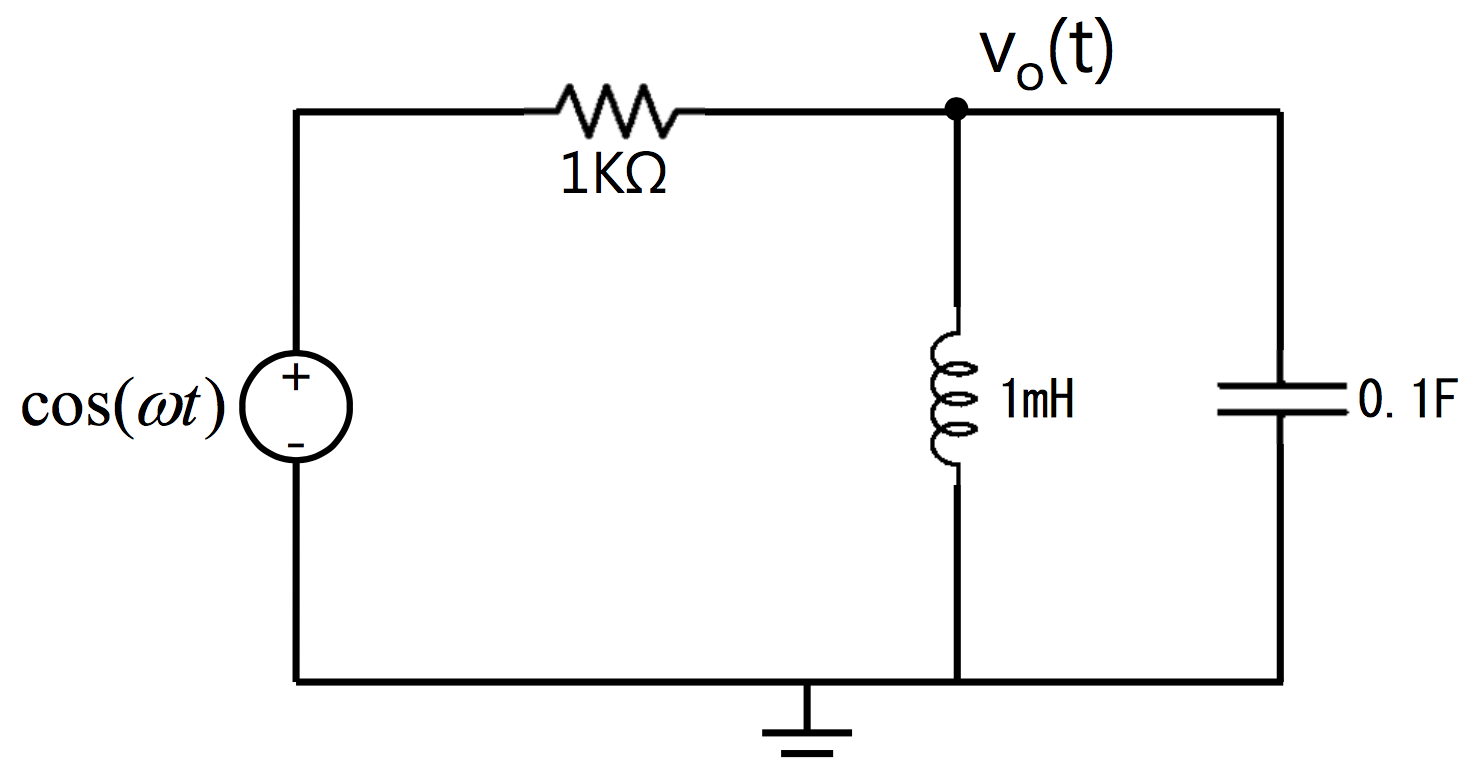

In [41]:
from IPython.display import Image
Image(filename='img/circuits/original_circuit.png')

이것을 PSIPICE로 재구현하면,

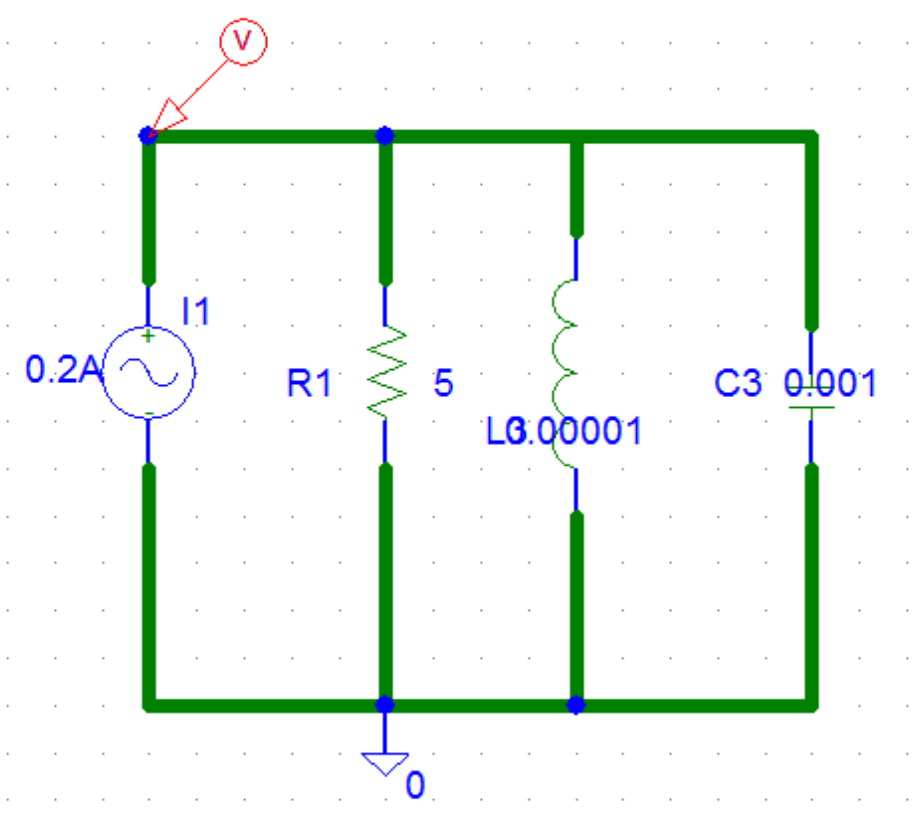

In [40]:
from IPython.display import Image
Image(filename='img/circuits/ex_circuit.png')

전압원과 직렬연결된 저항은 __소스변환__을 이용하여, 전류원과 병렬연결된 저항으로 바꾸었다. (병렬 공진회로를 만들기 위하여)

* $V의 크기 = 1, R = 5$ 로부터 $I의 크기 = 0.2$를 유도하였다.

# 2. 이론값 계산

이론에 따라 문제를 풀어보면,

In [24]:
from math import sqrt, pi

In [28]:
R = 5
L = 10 * (10 ** (-6))
C = 1 * (10 ** (-3))
W0 = 1 / sqrt(L * C)
f0 = W0 / (2 * pi)
B = 1 / (R * C)
Q = W0 / B

각각의 값을 출력해보면,

In [29]:
print("W0 =", W0, "rad/s")

W0 = 10000.0 rad/s


In [30]:
print("f0 =", f0, "Hz")

f0 = 1591.5494309189535 Hz


In [22]:
print("B =", B, "rad/s")

B = 200.0 rad/s


In [23]:
print("Q =", Q)

Q = 50.0


# 3. 파형 및 공진 주파수 계산

위의 PISPICE 회로를 통하여 나온 파형은 아래와 같다.

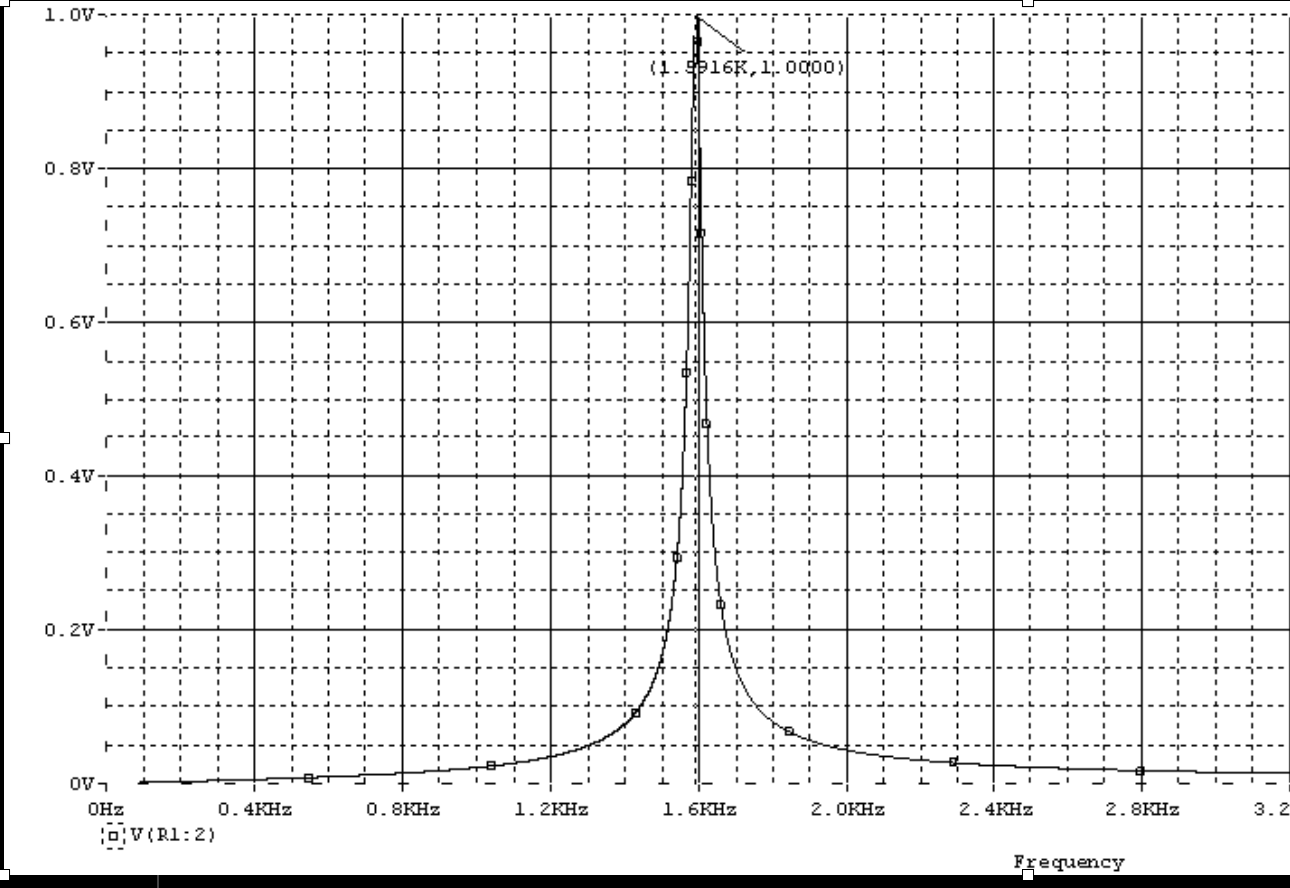

In [42]:
from IPython.display import Image
Image(filename='img/circuits/result_wave.png')

In [39]:
(abs(f0 - 1591.6) / f0) * 100

0.003177349070285214

* 위의 구현은 아래의 계산식이다.

$(\ \frac{|f이론 - f실험|}{\ f이론}\ \ \ \ ) * 100$

위의 계산에 따르면, 약간의 오차(0.003%)만이 발생했으며, 이것은 정밀도 (Pts) : 100k를 고려할 때 타당한 범위라고 판단하였다.

# 4. B, Q 계산

PSPICE로 밴드폭 계산을 하면,

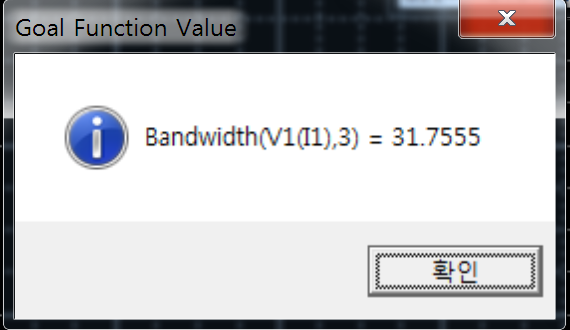

In [43]:
from IPython.display import Image
Image(filename='img/circuits/BandWidth.png')

* 오차범위가 상당하여, 여러 방법으로 구현을 시도하였으나 같은 결과가 반복되었다. 따라서, 실수라기 보다는 초기설정의 문제 때문인 것으로 보인다.

위의 결과를 이용해 `Q`를 구하면,

In [44]:
B_ = 31.7555
Q_ = W0 / B_
Q_

314.90607926186016

약 315로 역시 이론값과의 차이가 벌어졌다.

# 5. 결론

PSPICE로 회로값을 구하는 과정에서 생기는 미묘한 오차들은 다수가 설정값의 차이로 인해 벌어지는 결과들이었다.

하지만 정교하게 설정할 수록 구현한 값이 이론값에 가까워짐을 확인하였다.